<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/Seoul_Bike_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seoul Bike Sharing Demand Prediction**

**Tugas Besar AI - Linear Regression**

Dataset: Seoul Bike Sharing Demand (UCI ML Repository)

Objective: Memprediksi jumlah sepeda yang disewa berdasarkan kondisi cuaca dan waktu

---
## Data Acquisition

In [41]:
!pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns', None)

In [42]:
plt.rcParams.update({
    'axes.facecolor': '#1a1a1a',
    'figure.facecolor': '#1a1a1a',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'grid.color': '#333333'
})

In [43]:
dataset = fetch_ucirepo(id=560)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


---
## Data Understanding

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [46]:
df.isnull().sum().to_frame('missing_count')

,missing_count
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


In [47]:
df[['Seasons', 'Holiday', 'Functioning Day']].apply(lambda x: x.value_counts()).T

,Autumn,Holiday,No,No Holiday,Spring,Summer,Winter,Yes
Seasons,2184.0,NaN,NaN,NaN,2208.0,2208.0,2160.0,NaN
Holiday,NaN,432.0,NaN,8328.0,NaN,NaN,NaN,NaN
Functioning Day,NaN,NaN,295.0,NaN,NaN,NaN,NaN,8465.0


---
## Exploratory Data Analysis (EDA)

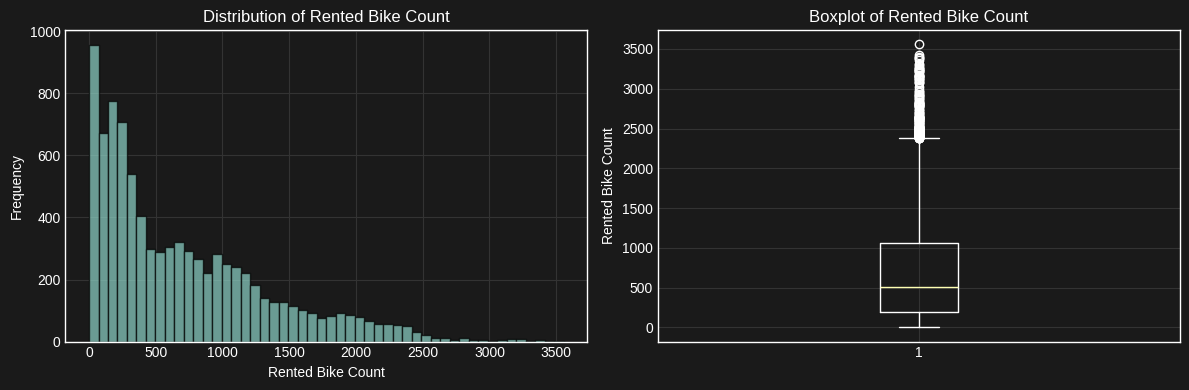

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['Rented Bike Count'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Rented Bike Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Rented Bike Count')

axes[1].boxplot(df['Rented Bike Count'], vert=True)
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Boxplot of Rented Bike Count')

plt.tight_layout()
plt.show()

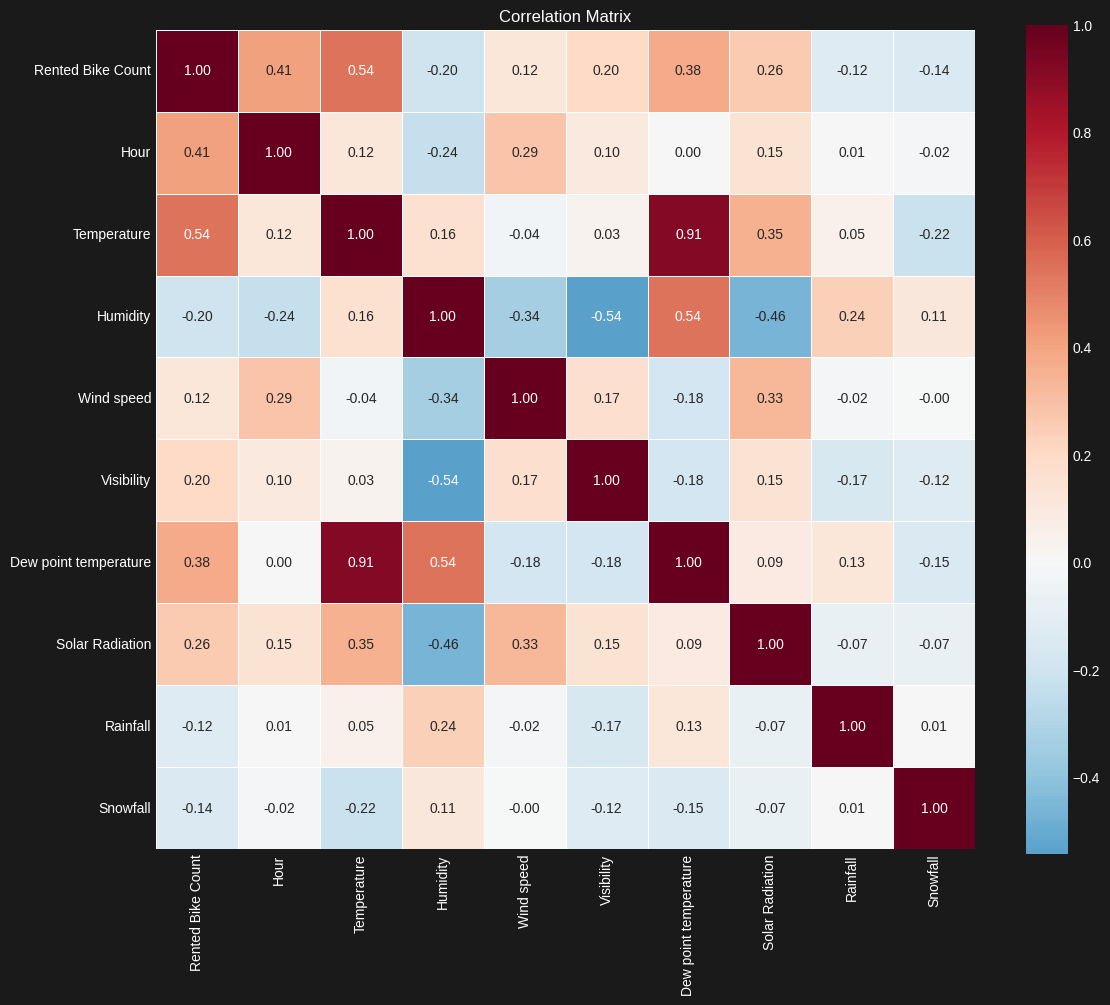

In [49]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [50]:
corr_matrix['Rented Bike Count'].sort_values(ascending=False).to_frame('correlation')

,correlation
Rented Bike Count,1.000000
Temperature,0.538558
Hour,0.410257
Dew point temperature,0.379788
Solar Radiation,0.261837
Visibility,0.199280
Wind speed,0.121108
Rainfall,-0.123074
Snowfall,-0.141804
Humidity,-0.199780


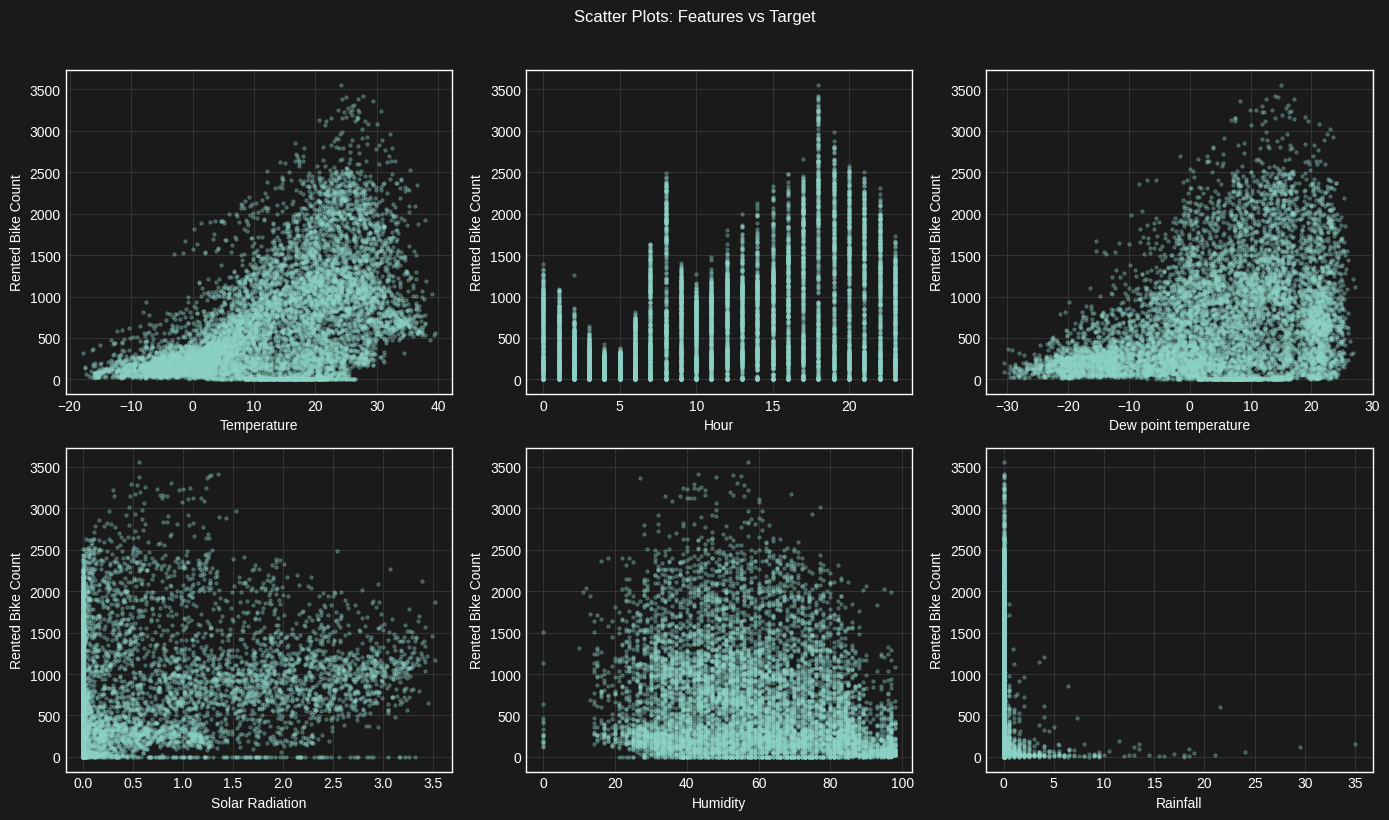

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

top_features = ['Temperature', 'Hour', 'Dew point temperature',
                'Solar Radiation', 'Humidity', 'Rainfall']

for idx, feat in enumerate(top_features):
    ax = axes[idx // 3, idx % 3]
    ax.scatter(df[feat], df['Rented Bike Count'], alpha=0.3, s=5)
    ax.set_xlabel(feat)
    ax.set_ylabel('Rented Bike Count')

plt.suptitle('Scatter Plots: Features vs Target', y=1.02)
plt.tight_layout()
plt.show()

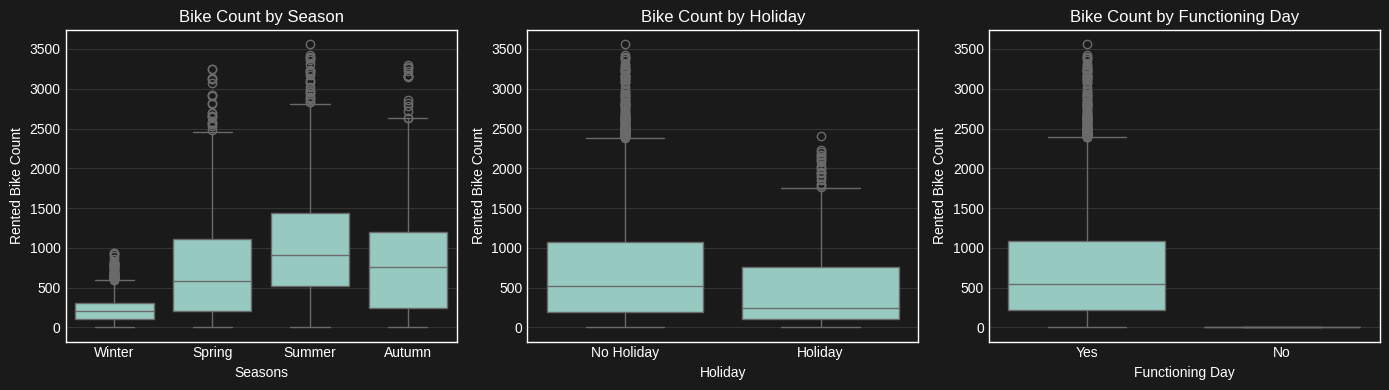

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.boxplot(data=df, x='Seasons', y='Rented Bike Count', ax=axes[0])
axes[0].set_title('Bike Count by Season')

sns.boxplot(data=df, x='Holiday', y='Rented Bike Count', ax=axes[1])
axes[1].set_title('Bike Count by Holiday')

sns.boxplot(data=df, x='Functioning Day', y='Rented Bike Count', ax=axes[2])
axes[2].set_title('Bike Count by Functioning Day')

plt.tight_layout()
plt.show()

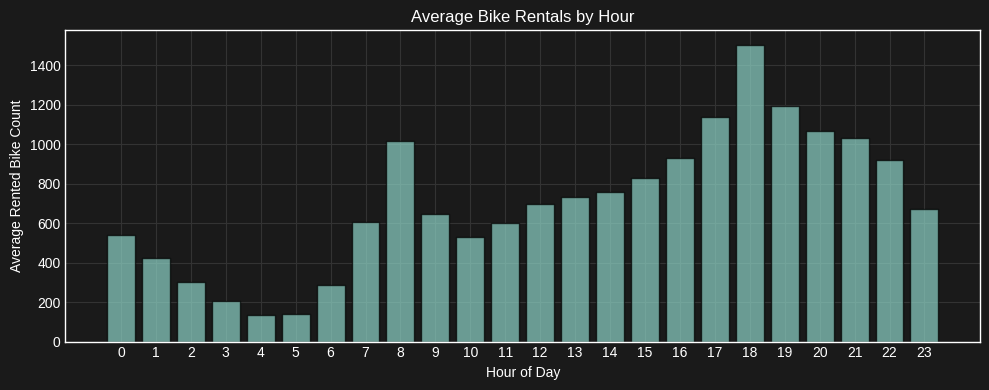

In [53]:
hourly_avg = df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(10, 4))
plt.bar(hourly_avg.index, hourly_avg.values, edgecolor='black', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Bike Rentals by Hour')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### EDA Summary

- Target variable (Rented Bike Count) right-skewed dengan outliers di atas 2500
- Temperature (r=0.54) dan Hour (r=0.41) korelasi positif tertinggi
- Temperature dan Dew Point Temperature korelasi 0.91 (hapus salah satu)
- Humidity berkorelasi negatif (-0.20)
- Peak rental jam 8 pagi dan 6 sore (rush hour commute)
- Summer rental tertinggi, Winter terendah
- Non-functioning day rental mendekati 0

---
## Preprocessing

### Encode Kategorikal

In [54]:
season_map = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
holiday_map = {'No Holiday': 0, 'Holiday': 1}
func_map = {'No': 0, 'Yes': 1}

df['Seasons'] = df['Seasons'].map(season_map)
df['Holiday'] = df['Holiday'].map(holiday_map)
df['Functioning Day'] = df['Functioning Day'].map(func_map)

df[['Seasons', 'Holiday', 'Functioning Day']].head(10)

,Seasons,Holiday,Functioning Day
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
5,1,0,1
6,1,0,1
7,1,0,1
8,1,0,1
9,1,0,1


### Hapus Outliers

In [55]:
shape_before = df.shape[0]

df = df[
    (df['Rented Bike Count'] <= 2500) &
    (df['Rainfall'] <= 10) &
    (df['Snowfall'] <= 4) &
    (df['Wind speed'] <= 5) &
    (df['Solar Radiation'] <= 3.5)
]

shape_after = df.shape[0]

pd.DataFrame({
    'status': ['before', 'after', 'removed'],
    'rows': [shape_before, shape_after, shape_before - shape_after]
})

,status,rows
0,before,8760
1,after,8587
2,removed,173


### Drop Multicollinearity

In [56]:
df = df.drop(columns=['Dew point temperature', 'Date'])
df.columns.tolist()

['Rented Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Solar Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning Day']

### Prepare X dan y

In [57]:
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

pd.DataFrame({'set': ['X', 'y'], 'shape': [X.shape, y.shape]})

,set,shape
0,X,"(8587, 11)"
1,y,"(8587,)"


---
## Split Data

### Train Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pd.DataFrame({
    'set': ['train', 'test'],
    'X_shape': [X_train.shape, X_test.shape],
    'y_shape': [y_train.shape, y_test.shape]
})

,set,X_shape,y_shape
0,train,"(6869, 11)","(6869,)"
1,test,"(1718, 11)","(1718,)"


---
## Linear Regression Model

### Train dan Predict

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

pd.DataFrame({'actual': y_test[:10].values, 'predicted': y_pred[:10].round(2)})

,actual,predicted
0,859,599.29
1,210,607.07
2,1021,1152.11
3,119,156.12
4,1811,1332.74
5,1956,1419.60
6,333,624.76
7,155,278.26
8,930,894.87
9,83,-223.65


---
## Model Evaluation

###  Metrics

In [60]:
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

pd.DataFrame({
    'metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'value': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)]
})

,metric,value
0,R²,0.5615
1,Adjusted R²,0.5587
2,MAE,296.2900
3,MSE,150696.1600
4,RMSE,388.2000


### Actual vs Predicted Plot

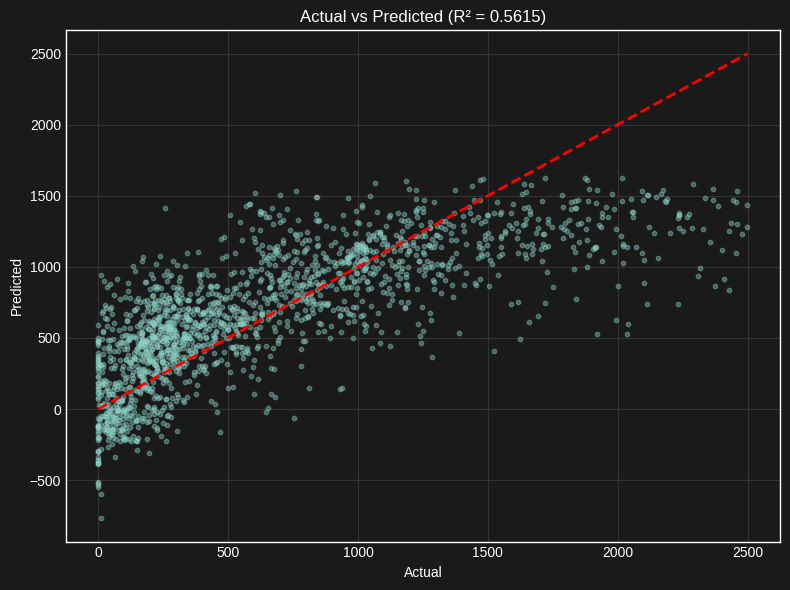

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, y_pred, alpha=0.4, s=10)
ax.plot([0, 2500], [0, 2500], 'r--', lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.tight_layout()
plt.show()

### Residual Plot

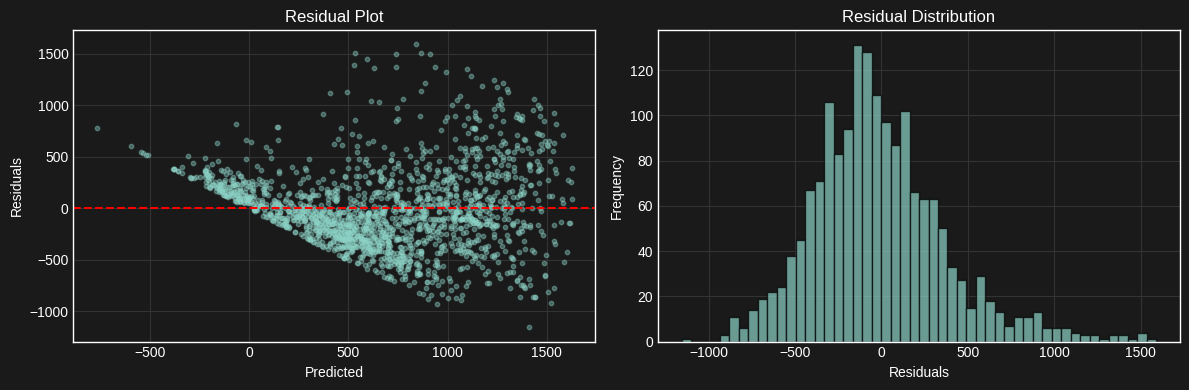

In [62]:
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(y_pred, residuals, alpha=0.4, s=10)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')

axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution')

plt.tight_layout()
plt.show()

---
## Interpretation

### Koefisien

In [63]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')
coef_df

,feature,coefficient
10,Functioning Day,905.485701
6,Rainfall,-116.560630
8,Seasons,113.633232
9,Holiday,-102.327703
5,Solar Radiation,-59.193711
0,Hour,26.062479
1,Temperature,24.342096
3,Wind speed,20.640243
7,Snowfall,12.369881
2,Humidity,-6.975407


### Feature Importance Plot

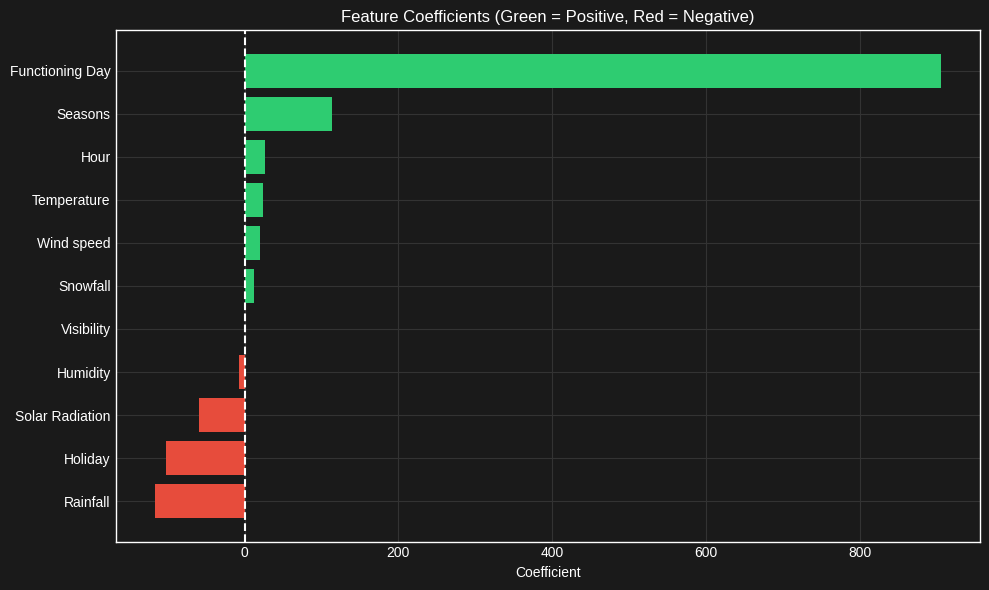

In [64]:
coef_sorted = coef_df.sort_values('coefficient')

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coef_sorted['coefficient']]
ax.barh(coef_sorted['feature'], coef_sorted['coefficient'], color=colors)
ax.axvline(x=0, color='white', linestyle='--')
ax.set_xlabel('Coefficient')
ax.set_title('Feature Coefficients (Green = Positive, Red = Negative)')
plt.tight_layout()
plt.show()

### Persamaan Regresi

In [65]:
intercept = model.intercept_
equation = f"Rented Bike Count = {intercept:.2f}"
for feat, coef in zip(X.columns, model.coef_):
    sign = '+' if coef >= 0 else '-'
    equation += f" {sign} {abs(coef):.2f}*{feat}"

print("Regression Equation:")
print(equation)

Regression Equation:
Rented Bike Count = -643.10 + 26.06*Hour + 24.34*Temperature - 6.98*Humidity + 20.64*Wind speed - 0.01*Visibility - 59.19*Solar Radiation - 116.56*Rainfall + 12.37*Snowfall + 113.63*Seasons - 102.33*Holiday + 905.49*Functioning Day


$$
\begin{align}
\hat{y} = & -643.10 \\
& + 26.06 \cdot \text{Hour} \\
& + 24.34 \cdot \text{Temperature} \\
& - 6.98 \cdot \text{Humidity} \\
& + 20.64 \cdot \text{Wind speed} \\
& - 0.01 \cdot \text{Visibility} \\
& - 59.19 \cdot \text{Solar Radiation} \\
& - 116.56 \cdot \text{Rainfall} \\
& + 12.37 \cdot \text{Snowfall} \\
& + 113.63 \cdot \text{Seasons} \\
& - 102.33 \cdot \text{Holiday} \\
& + 905.49 \cdot \text{Functioning Day}
\end{align}
$$